In [220]:
import requests
import pandas as pd
import numpy as np
import time
from tqdm import tqdm_notebook

1. Запрашиваем access token по адресу: https://vkhost.github.io/
2. Получаем ответ и сохраняем в файле token.txt

In [171]:
with open("C:/Jupyter_Notebooks/token.txt") as f:
  token = f.read()

Создадим для удобства функции

In [181]:
def groupsGet(user_id):
    version = '5.199'
    url = 'https://api.vk.com/method/groups.get' + '?' +'user_id=' + str(user_id) + '&v=' + version + '&access_token=' +  token
    response = requests.get(url)
    return response.json().get('response')

In [182]:
def friendsGet(user_id):
    version = '5.199'
    url = 'https://api.vk.com/method/friends.get?user_id=' + str(user_id) + '&v=' + version + '&access_token=' +  token
    response = requests.get(url)
    return response.json().get('response')

In [183]:
def wallGet(owner_id):
    version = '5.199'
    url = 'https://api.vk.com/method/wall.get?owner_id=' + str(owner_id) + '&count=50&v=' + version + '&access_token=' +  token
    response = requests.get(url)
    return response.json().get('response')

In [184]:
def isLiked(user_id, owner_id, item_id):
    version = '5.199'
    url = 'https://api.vk.com/method/likes.isLiked?user_id=' + str(user_id) + '&type=post&owner_id=' + str(owner_id) + '&item_id=' + item_id + '&v=' + version + '&access_token=' +  token
    response = requests.get(url)
    return response.json().get('response')

# Анализ поведения друзей ВКонтакте
1. Выгрузить посты из лент четырех друзей и меня, получить данные об их лайках и комментах. Записать результат в Pandas DataFrame и в CSV файл
2. Построить Superset-дашборд с оценкой среднего CTR (лайк, коммент) по постам в топ 10 групп моих топ 4 друзей и меня
3. Построить Superset-дашборд с оценкой среднего CTR (лайк, коммент) по друзьям и мне

In [100]:
user_ids = ['560276504', '519552111', '413980874', '303943594', '519556029']

In [101]:
names = ['Максим', 'Татьяна', 'Арсений', 'Алина', 'Олег']

## 1. Выгрузка постов

In [193]:
for i, user_id in enumerate(user_ids):
    
    feed = {
        'page_id': [],
        'post_id': [],
        'text': [],
        'likes': [],
        'comments': [],
        'views': []
    }
    
    groups = groupsGet(user_id)['items']
    for group in tqdm_notebook(groups):
        time.sleep(0.4)
        wall = wallGet('-' + str(group))
        if wall != None:
            wall = wall['items']
            feed['page_id'].extend(['-' + str(group) for post in wall])
            feed['post_id'].extend([post.get('id') for post in wall])
            feed['text'].extend([post.get('text') for post in wall])
            feed['likes'].extend([post.get('likes').get('count') if post.get('likes') != None else None for post in wall])
            feed['comments'].extend([post.get('comments').get('count') if post.get('comments') != None else None for post in wall])
            feed['views'].extend([post.get('views').get('count') if post.get('views') != None else None for post in wall])
    
    friends = friendsGet(str(user_id))['items']
    for friend in tqdm_notebook(friends):
        time.sleep(0.4)
        wall = wallGet(friend)
        if wall != None:
            wall = wall['items']
            feed['page_id'].extend([str(friend) for post in wall])
            feed['post_id'].extend([post.get('id') for post in wall])
            feed['text'].extend([post.get('text') for post in wall])
            feed['likes'].extend([post.get('likes').get('count') if post.get('likes') != None else None for post in wall])
            feed['comments'].extend([post.get('comments').get('count') if post.get('comments') != None else None for post in wall])
            feed['views'].extend([post.get('views').get('count') if post.get('views') != None else None for post in wall])

    df = pd.DataFrame(feed)
    df.to_csv('Лента_' + names[i])

C:\Users\zinov\AppData\Local\Temp\ipykernel_11816\1347290676.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for group in tqdm_notebook(groups):


  0%|          | 0/55 [00:00<?, ?it/s]

C:\Users\zinov\AppData\Local\Temp\ipykernel_11816\1347290676.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for friend in tqdm_notebook(friends):


  0%|          | 0/279 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

## Исследуем получившийся набор данных

In [214]:
df = pd.read_csv("C:/Users/zinov/Jupyter_Notebook/Лента_Максим", index_col=0)

In [216]:
df['ER'] = (df['likes'] + df['comments']) / df['views']

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7813 entries, 0 to 7812
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   page_id   7813 non-null   int64  
 1   post_id   7813 non-null   int64  
 2   text      4379 non-null   object 
 3   likes     7812 non-null   float64
 4   comments  7813 non-null   int64  
 5   views     6825 non-null   float64
 6   ER        6825 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 488.3+ KB


In [217]:
df.sort_values(by='ER', ascending = False)

,page_id,post_id,text,likes,comments,views,ER
4848,160456462,1373,NaN,2864.0,0,6100.0,0.469508
6928,360101151,52,"В 11 класс. Так грустно осознавать, что послед...",47.0,0,104.0,0.451923
6940,360101151,39,NaN,31.0,0,80.0,0.387500
6843,328472533,371,NaN,81.0,0,237.0,0.341772
4410,140818451,50,NaN,18.0,0,54.0,0.333333
...,...,...,...,...,...,...,...
7663,599999955,429,Ариночка С днём рождения 🥳,3.0,1,NaN,NaN
7712,698418237,2042,NaN,0.0,0,NaN,NaN
7713,698418237,2041,NaN,0.0,0,NaN,NaN
7778,715787807,11273,Уважаемая Елена Викторовна! От лица нашего УИК...,11.0,1,NaN,NaN


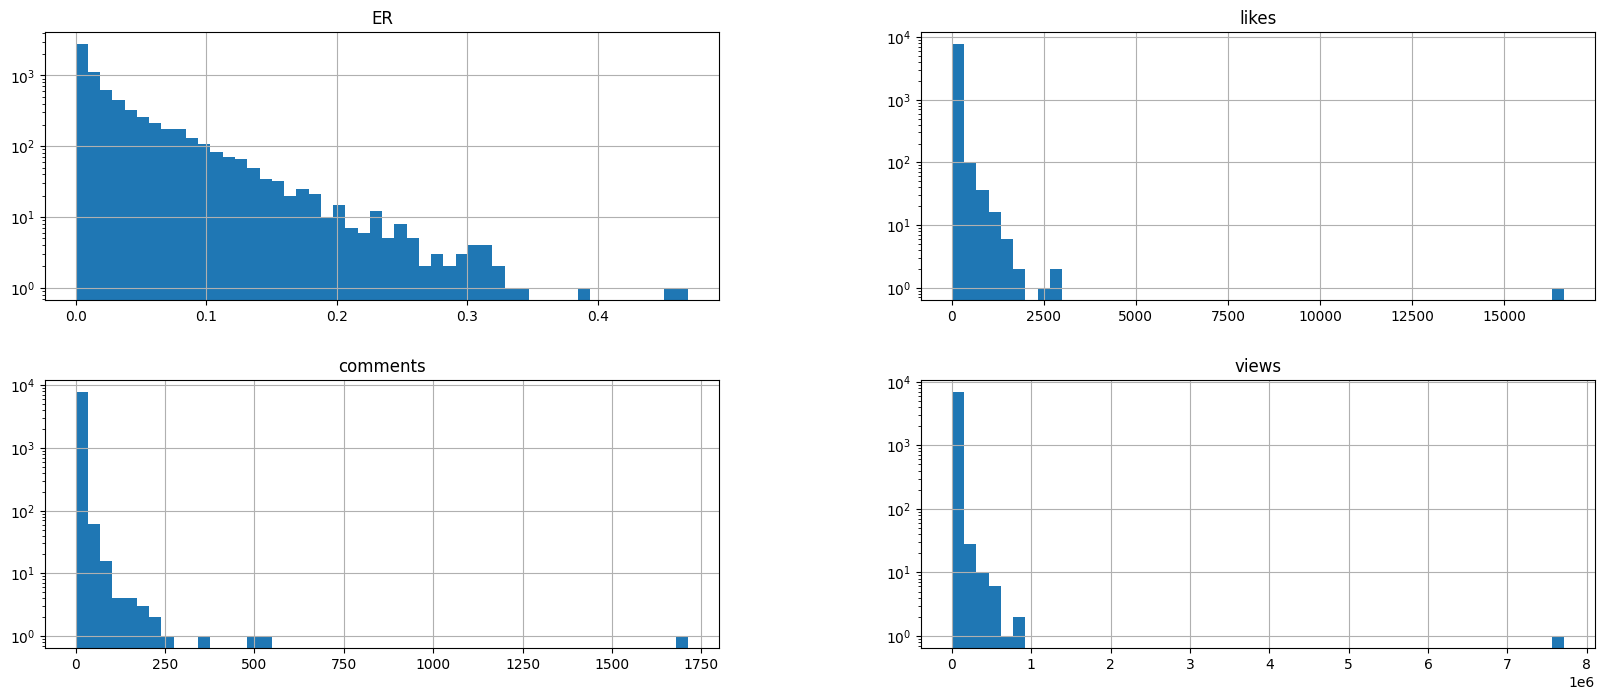

In [225]:
df[['ER', 'likes', 'comments', 'views']].hist(bins = 50, figsize = (20, 8), log = True);